In [9]:
# Libraries to be employed
import sympy as sp
import numpy as np
import sympy.plotting as pls
import matplotlib.pyplot as plt
from sympy.parsing.sympy_parser import parse_expr
from IPython.display import Latex, display
import math as mt
from IPython.display import display, Math
import warnings
import seaborn as sns


# **Universidad del Norte**
## **Departamento de Ingeniería de Sistemas**
## IST7420 - Parcial 1


Consider the Elias'es function

$$f({\bf x}) = \sum_{i=1}^{n} \left [ x_i^4 + \sin(x_i^2) \right] + \prod_{i=1}^n x_i \cdot \cos(x_i^3) \,,$$
%
$$ {\bf x} = \left [ x_1,\,x_2,\, \ldots,\, x_n \right ]^T \in \R^{n \times 1} $$

$$\begin{eqnarray}
f({\bf x}) &=& f ({\bf x}_0) +{\bf p}^T \cdot \nabla f({\bf x}_0) \\
&& + \frac{1}{2} \cdot {\bf p}^T \cdot \nabla^2 f({\bf x}_0) \cdot {\bf p} + \mathcal{O}(\nabla^3) \,,
\end{eqnarray}$$

$x_0$ is the expansion point and $p = x - x_0$


By using `sympy` compute the function, the gradient, and the Hessian for $n=2$. Show them by using the Latex interpreter. (100 pts)


 Función: 
 


<IPython.core.display.Latex object>


 Gradiente de la función: 



<IPython.core.display.Latex object>


 Hessiano de la función: 



<IPython.core.display.Latex object>



 Grafico de la función
 


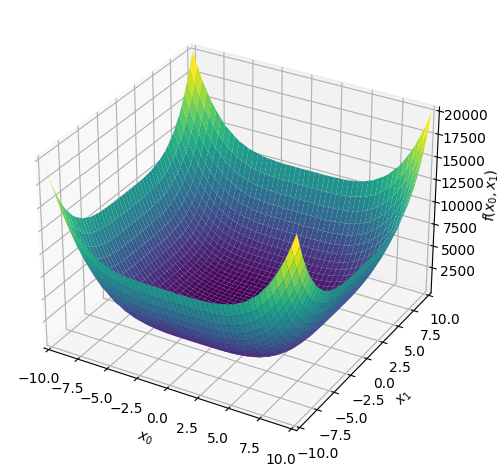

In [10]:
# Your code here

n=2
xs = [f'x_{i}' for i in range(n)]
x=sp.Matrix(xs) # xs y x son las variables que conformaran la función (x_0,...,x_n)

def function(x,n): #función
  s=0
  for i in range(n): s+= x[i]**4 + sp.sin(x[i]**2)
  pr=1
  for j in range(n): pr=pr*x[j]*sp.cos(x[j]**3)
  return s + pr

def gradient(f,x,n): #Gradiente
  g = sp.zeros(n,1)
  for i in range(n):
    g[i] = sp.diff(f,x[i])
  return g

def hessian(f,x,n): # Hessiano
  H = sp.zeros(n)
  for i in range(n):
    for j in range(n):
      H[i,j] = sp.diff(sp.diff(f,x[i]),x[j])
  return H

# escribimos la función, el gradiente y el hessiano
n = 2
print("\n Función: \n ")
fx = function(x,n)
display(Latex('$f({\\bf x }) = '+sp.latex(fx) + '$'))
print("\n Gradiente de la función: \n")
gx = gradient(fx,x,n)
display(Latex('$\\nabla f({\\bf x }) = '+sp.latex(gx) + '$'))
print("\n Hessiano de la función: \n")
Hx = hessian(fx,x,n)
display(Latex('$\\nabla^2f({\\bf x }) = '+sp.latex(Hx) + '$'))

print("\n\n Grafico de la función\n ")
pls.plot3d(fx) #solo si la dimencion (n) es 2


By using sympy, plot the function $f({\bf x})$, a linear Taylor approximation of $f({\bf x})$, and a quadratic one of it. For the approximations choose ${\bf x}_0 = [1,\,2]^T$. Keep $n=2$. (50 pts)


calculamos f_0:



<IPython.core.display.Latex object>


 ahora el gf_0: 



<IPython.core.display.Latex object>


 luego el P0: 



<IPython.core.display.Latex object>


 y por ultimo la aproximación lineal: 



<IPython.core.display.Latex object>


 Grafico de la aproximación lineal: 



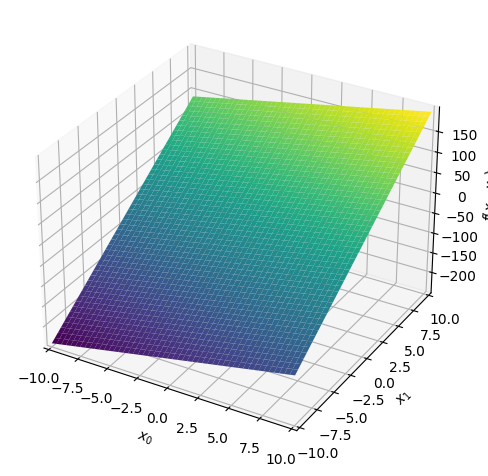


 calculo de Q0:


<IPython.core.display.Latex object>


 Grafico de la aproximación cuadratica: 



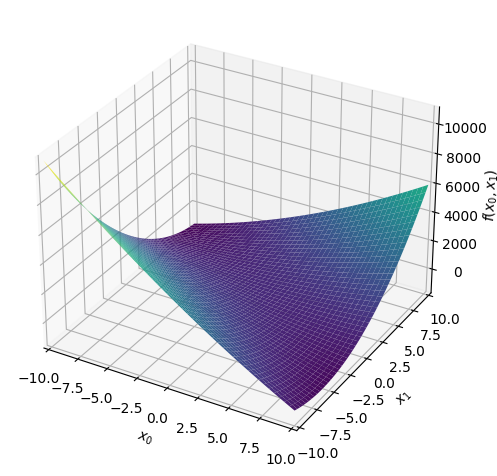

In [11]:
# your code here
x0 = [1,2]
subs_ = {x[i]: x0[i] for i in range(n)}
f_0 = fx.subs(subs_)
gf_0 = gx.subs(subs_)
print("\ncalculamos f_0:\n")
display(Latex("$"+sp.latex(f_0)+"$"))
print("\n ahora el gf_0: \n")
display(Latex('$'+sp.latex(gf_0)+'$'))
print("\n luego el P0: \n")
p0 = x-sp.Matrix(x0)
display(Latex('$'+sp.latex(p0)+'$'))
print("\n y por ultimo la aproximación lineal: \n")
L0 = f_0 + p0.dot(gf_0)
display(Latex('$L_0 ({\\bf x}) = ' + sp.latex(L0)+'$'))

print("\n Grafico de la aproximación lineal: \n")
pls.plot3d(L0)

#aproximación cuadratica:

Hf_0 = Hx.subs(subs_)
print("\n calculo de Q0:")
Q0 = L0 + 0.5*p0.dot(Hf_0.multiply(p0))

display(Latex('$Q_0 ({\\bf x}) = '+sp.latex(Q0)+"$"))
print("\n Grafico de la aproximación cuadratica: \n")
pls.plot3d(Q0)



By using the Newton's method, compute a critical point of $f({\bf x})$. The initial condition reads ${\bf x}^{(0)} = [10,\,10]^T$. Set the number of iterations to 50. Show gradient norms across iterations (150 pts).

In [12]:
# your code here
x_ = sp.Matrix([10,10]) # AQUI VAN LOS VALORES DE ENTRADA DE LA FUNCION, EQIUVALENTES A n
Xk = [x_]
gradient_norm = []
for i in range(50):
  xk = {x[i]: x_[i] for i in range(n)}
  Hf_k = Hx.subs(xk) #genera el hessiano
  gf_k = gx.subs(xk) #genera el gradiente
  dx_k = Hf_k.inv().multiply(-gf_k) #genera el delta para el nuevo x_k
  gradient_norm.append(dx_k.norm().evalf()) #evalua y almacena el erroe de la iteración
  x_ = x_ + dx_k.evalf() #calcula el nuevo x_k a partir del delta
  Xk.append(x_)
print("\n x_k final: \n")     #printemos los resultados finales para x_
display(Latex('${\\bf x} = ' + sp.latex(x_)+'$'))
print("\n errores a travez de las iteraciones(Gradient norms): \n")
gradient_norm = np.array(gradient_norm,dtype=np.float64); #printeo de los errores
print(gradient_norm)


 x_k final: 



<IPython.core.display.Latex object>


 errores a travez de las iteraciones(Gradient norms): 

[4.25535637e-03 2.41970265e-03 3.50202811e-04 9.70200708e-06
 5.53765457e-09 8.72042235e-16 8.72042235e-16 8.72042235e-16
 8.72042235e-16 8.72042235e-16 8.72042235e-16 8.72042235e-16
 8.72042235e-16 8.72042235e-16 8.72042235e-16 8.72042235e-16
 8.72042235e-16 8.72042235e-16 8.72042235e-16 8.72042235e-16
 8.72042235e-16 8.72042235e-16 8.72042235e-16 8.72042235e-16
 8.72042235e-16 8.72042235e-16 8.72042235e-16 8.72042235e-16
 8.72042235e-16 8.72042235e-16 8.72042235e-16 8.72042235e-16
 8.72042235e-16 8.72042235e-16 8.72042235e-16 8.72042235e-16
 8.72042235e-16 8.72042235e-16 8.72042235e-16 8.72042235e-16
 8.72042235e-16 8.72042235e-16 8.72042235e-16 8.72042235e-16
 8.72042235e-16 8.72042235e-16 8.72042235e-16 8.72042235e-16
 8.72042235e-16 8.72042235e-16]


Cuando usamos el metodo de newton siempre es indispenzable trabajar dentro de un rango especifico de valores iniciales, los nuestros fueron $[10,\,10]^T$ y, luego de realizar varias pruebas nos dimos cuenta que este junto con cualquier otro valor en los rangos $(\frac{\pi}{2},\infty)$ U $(-\infty,-\frac{\pi}{2})$ tiende a alejarce del punto critico, sin embargo valores no pertenecientes a este rango se aproximan hacia los valores reales del minimo de la funcion que son $x^*=(0,0)$

**Observación:** Antes de solicitar ayuda a sus compañeros o ayudar a sus compañeros, tenga en cuenta lo siguiente:


*   Su puntuación máxima es 300 pts.
*   El cálculo de su nota se realizará según la siguiente lógica:
$$Nota = 3.5 + 1.5\frac{X - PC}{MX - PC}$$

donde:

*   $PC=$ puntuación promedio de todos los estudiantes.
*   $MX=$ máxima puntuación obtenida en la clase.
*   $X=$ su puntuación

**Nota:** Por favor incluir en el archivo que contenga la solución los script, funciones, gráficas, código y cualquier otro elemento utilizado. No coloque respuestas sin justificación, muestre todo los desarrollos.

**Recuerde:** En este curso no se tolerará el plagio. Sin excepción, en caso de presentarse esta situación, a los estudiantes involucrados se les iniciará proceso de investigación, y se actuará en conformidad con el Reglamento de Estudiantes de la Universidad del Norte. El plagio incluye: usar contenidos sin la debida referencia, de manera literal o con mínimos cambios que no alteren el espíritu del texto/código; adquirir con o sin intención, trabajos de terceros y presentarlos parcial o totalmente como propios; presentar trabajos en grupo donde alguno de los integrantes no trabajó o donde no se hubo trabajo en equipo demostrable; entre otras situaciones definidas en el manual de fraude académico de la Universidad del Norte [(pdf)](https://guayacan.uninorte.edu.co/normatividad_interna/upload/File/Guia_Prevencion_Fraude%20estudiantes(5).pdf).